In [102]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import heapq
import pandas as pd
import pickle as pkl


In [107]:
D = nx.DiGraph(name="river_network")
D.add_nodes_from(range(1, 16))
#D.add_node(17, pos=(1,1))

D.add_node(1,pos=(100,2))
D.add_node(2,pos=(110,7))
D.add_node(3,pos=(118,12))
D.add_node(4,pos=(125,15))
D.add_node(5,pos=(130,1))
D.add_node(6,pos=(137,3))
D.add_node(7,pos=(140,12))
D.add_node(8,pos=(120,35))
D.add_node(9,pos=(114,25))
D.add_node(10,pos=(115,73))
D.add_node(11,pos=(133,27))
D.add_node(12,pos=(129,33))
D.add_node(13,pos=(136,44))
D.add_node(14,pos=(126,63))
D.add_node(15,pos=(120,108))
D.add_node(16,pos=(125,180))

D.add_edges_from(
    [
        (1, 10),
        (2, 9),
        (3, 9),
        (4, 12),
        (5, 11),
        (6, 11),
        (7, 13),
        (8, 14),
        (9, 10),
        (11, 12),
        (12, 13),
        
        (13, 14),
        (14, 15),
        (10, 15),
        (15, 16),
    ]
)
labels = {
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "10",
    11: "11",
    12: "12",
    13: "13",
    14: "14",
    15: "15",
    16: "16",
    17: "17",
    18: "18",
    19: "19",
}

D = D.reverse()
#pos = nx.spring_layout(D)


pos=nx.get_node_attributes(D,'pos')
# pos = {
#  '1': (1, 1),
#  '2': (80, 192),
#  '3': (85, 192),
#  '4': (95, 23),
#  '5': (86, 51),
#  '6': (89, 58),
#  '7': (91, 75),
#  '8': (85, 81),
#  '9': (71, 18),
#  '10': (74, 24),
#  '11': (71, 55),
#  '12': (66, 62),
#  '13': (60, 30),
#  '14': (58, 51),
#  '15': (50, 22),
#  '16': (40, 45),
#  '17': (35, 30),
#  '18': (25, 55),
#  '19': (15, 60),
# }

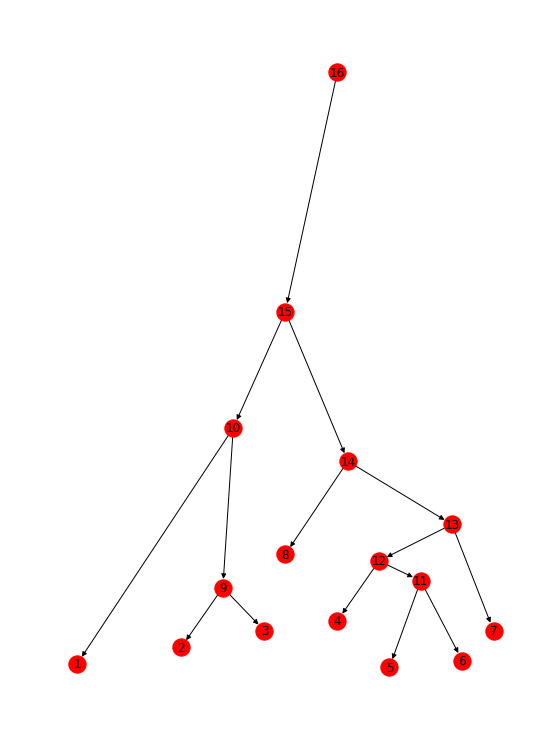

In [113]:
plt.figure(figsize=(7,10))
nx.draw(D, pos,with_labels=labels, color='blue')
plt.show()



In [198]:
#Input should be a directed acyclic graph 
# with breadth-first node numbering

def calc_Rb(D):
    
    if nx.is_directed_acyclic_graph(D) == False:
        return print('Input should be a directed acyclic graph sukkel')

    order_array = np.zeros(nx.number_of_nodes(D))

    for i in range(nx.number_of_nodes(D)-1,-1,-1):
        print(i)
        if len(nx.descendants(D,i)) == 0 or len(nx.descendants(D,i)) == 1:
            order_array[i] = 1
        else:
            des_list = list(D.successors(i))
            des_list = [int(h) for h in des_list]
            max_orders = heapq.nlargest(2, order_array[des_list])            
         
            if len(max_orders) == 1:
                order_array[i] = max_orders[0]
            if len(max_orders) == 0:
                order_array[i] = 0
                
                  
            else:
                  

                if max_orders[0] == max_orders[1]:
                    order_array[i] = max_orders[0] + 1
                else:
                    order_array[i] = max_orders[0]
                    
    if len(order_array) < 1:
        R_b = 0
        
    else:

        R_i = int(max(order_array) - 1)
        R_b = np.zeros(R_i)

        for i in range(R_i):
            R_b[i] = sum(order_array == i+1)/sum(order_array == i+2)
        
        
    return R_b, order_array




In [199]:
slopes = [0.0001,0.0002,0.0004,0.0006,0.0008,0.001]
names=[]

for i in range(1,31):
    for s in slopes:
        names.append('splits_slope_' + str(s) +'_version_' + str(i) +'.p')

splits_slope_0.0001_version_1.p
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0002_version_1.p
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0004_version_1.p
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0006_version_1.p
2
1
0
splits_slope_0.0008_version_1.p
splits_slope_0.001_version_1.p
splits_slope_0.0001_version_2.p
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0002_version_2.p
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0004_version_2.p
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0006_version_2.p
splits_slope_0.0008_version_2.p
splits_slope_0.001_version_2.p
splits_slope_0.0001_version_3.p
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0002_version_3.p
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0004_version_3.p
4
3
2
1
0
splits_slope_0.0006_version_3.p
4
3
2
1
0
splits_slope_0.0

26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0004_version_23.p
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0006_version_23.p
splits_slope_0.0008_version_23.p
splits_slope_0.001_version_23.p
splits_slope_0.0001_version_24.p
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0002_version_24.p
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0004_version_24.p
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0006_version_24.p
8
7
6
5
4
3
2
1
0
splits_slope_0.0008_version_24.p
2
1
0
splits_slope_0.001_version_24.p
splits_slope_0.0001_version_25.p
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0002_version_25.p
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0004_version_25.p
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0006_version_25.p
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
splits_slope_0.0008_version

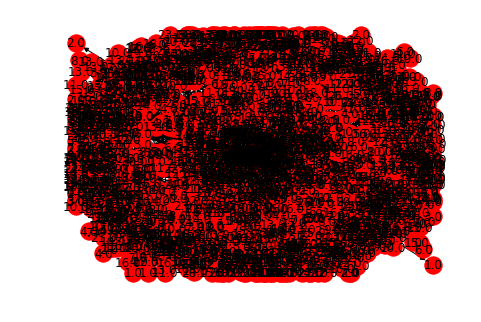

In [200]:
for i in names:
    print(i)
    data_split = pkl.load(open(i, 'rb'))
    Graph = nx.DiGraph(data_split) 
    

    nx.draw_spring(Graph, with_labels=labels, color='blue')
    rb = calc_Rb(Graph)[0]
    



In [179]:
i

'path_matrix_with_slope_0.0001_version_1.csv'

In [189]:
N_ij = np.zeros((3,3))

order_arr = calc_Rb(Graph)[1]
for i in range(15):
    childs = list(D.successors(i+1))
    for j in childs:
        N_ij[int(order_arr[j]-1),int(order_arr[i]-1)] += 1
    
N_j = [sum(order_arr == i+1) for i in range(3)]


T_ij = N_ij/N_j

ValueError: max() arg is an empty sequence

In [122]:
T_ij

array([[0.        , 1.16666667, 0.        ],
       [0.        , 0.83333333, 0.5       ],
       [0.        , 0.        , 0.5       ]])

In [74]:
## names = []
slopes = [0.0001,0.0002,0.0004,0.0006,0.0008,0.001]
all_total_size = np.zeros((len(slopes),30))

for i in range(1,31):
    for s in slopes:
        names.append('path_matrix_with_slope_' + str(s) +'_version_' + str(i) +'.csv')
        
        
count = 0
        
for h in range(0,30):
    for s in range(0,6):
        count += 1
    
        riv_mat = pd.read_csv(names[count],header=None)

        total_size = 0

        for i in range(len(riv_mat)):
            loc_riv = np.where(riv_mat.loc[i,:] > 0)
            if len(loc_riv[0]) > 0:
                total_size += np.max(loc_riv) - (np.min(loc_riv)-1)
        
        all_total_size[s,h] = total_size


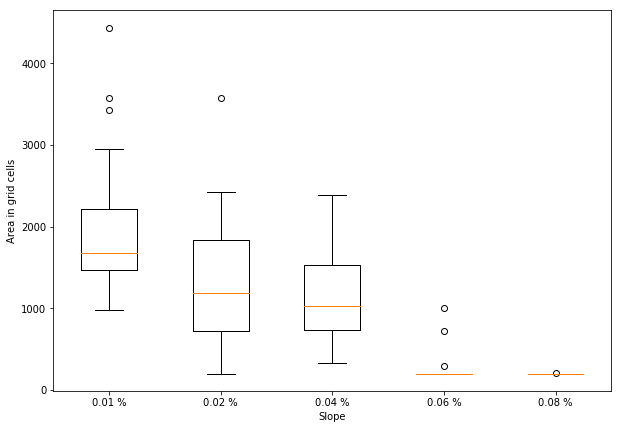

In [101]:
plt.figure(figsize=(10,7))

plt.boxplot((all_total_size[0].T,all_total_size[1].T,all_total_size[5].T,all_total_size[3].T,all_total_size[4].T))
plt.xticks([1, 2, 3,4,5], ['0.01 %', '0.02 %', '0.04 %','0.06 %','0.08 %'])
plt.xlabel('Slope')
plt.ylabel('Area in grid cells')
plt.show()

In [86]:
all_total_size[1].T

array([ 844.,  763.,  377., 1195., 1287., 1398., 2389., 1189.,  945.,
       1960., 1709.,  669., 1343., 2427.,  200., 1348., 1168., 2085.,
        200., 1069., 3578., 1874., 1936.,  707., 2320., 1643.,  967.,
        532.,  333.,  497.])

In [103]:
data_split = pkl.load(open('splits_slope_0.0001_version_1.p', 'rb'))

In [104]:
data_split

{0.0: (2.0, 1.0),
 1.0: (10.0, 9.0),
 2.0: (4.0, 3.0),
 3.0: (6.0, 5.0),
 4.0: (8.0, 7.0),
 5.0: (18.0, 17.0),
 6.0: (20.0, 19.0),
 7.0: (22.0, 21.0),
 8.0: (14.0, 13.0),
 9.0: (16.0, 15.0),
 10.0: (12.0, 11.0)}

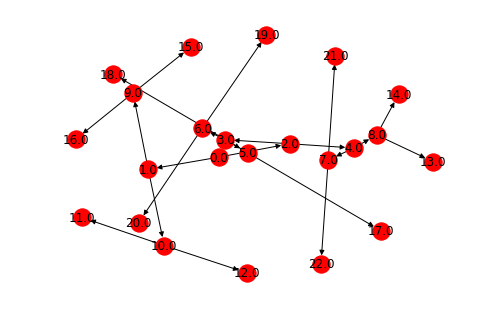

In [160]:
Graph = nx.DiGraph(data_split)



nx.draw_spring(Graph, with_labels=labels, color='blue')

In [143]:
calc_Rb(Graph)

IndexError: list index out of range

In [120]:
a = list(Graph.successors(1.0))

In [122]:
[int(i) for i in heapq.nlargest(2, a)]

[10, 9]

In [133]:
[int(z) for z in heapq.nlargest(2, order_array[[i - 1 for i in des_list]])]
         

NameError: name 'order_array' is not defined